In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
data=pd.read_excel(r'C:\Users\rahul\Documents\Python Examples\Projects\Flight Ticket Price Prediction\Data_Train.xlsx')

In [3]:
data.head()  # first 5 data of excel file

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
data.info()  # to get a rough information on the dataframe, datatypes, count of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [5]:
data.count()

Airline            10683
Date_of_Journey    10683
Source             10683
Destination        10683
Route              10682
Dep_Time           10683
Arrival_Time       10683
Duration           10683
Total_Stops        10682
Additional_Info    10683
Price              10683
dtype: int64

In [6]:
# we can see 9 features of the dataset contains 10683 rows and only 2 features cotains 10682 rows
# this means 2 rows contain missing values which need to be taken care of, 'Data Cleaning process' 

# to get summary statistics data:
data.describe()


,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
# to get the missing values or the tuples that contains missing values:

data.isna()  # alternate method data.isnull(), data.isna will give result in terms of boolean values

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
10678,False,False,False,False,False,False,False,False,False,False,False
10679,False,False,False,False,False,False,False,False,False,False,False
10680,False,False,False,False,False,False,False,False,False,False,False
10681,False,False,False,False,False,False,False,False,False,False,False


In [8]:
# to get the total no.of missing values of a particular feature or column, we use sum() built in function to get the total
data.isnull().sum()  

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [9]:
# To get the records containing missing values: ( In the dataset we found that there are 2 records missing )
data[data['Route'].isna() & data['Total_Stops'].isna()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [10]:
data1=data.copy()
data1.dropna(inplace=True)
print(data.isna().sum())  # data
print('\n--------------------------------------------------------------\n')
print(data1.isna().sum()) # data1

# data1 is the copy of data with records that don't contain null values

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

--------------------------------------------------------------

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64


In [11]:
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


# Analysis and Feature Engineering:
## 1. Duration. 
## 2. Departure and Arrival Time.
## 3. Date of Journey.
## 4. Total Stops. 
## 5. Addtional Info.
## 6. Airline. 
## 7. Source and Destination. 
## 8. Route. 

### Current Dataframe 'data1', scratch dataframe 'data'

# 1. Duration:  

In [12]:
 # create a function that converts hours into minutes that is 2hr 50min to 170min in all
def convert_Duration(Duration):
    if len(Duration.split())==2:  # condition for hours and minutes 
        hours=int(Duration.split()[0][:-1])  # this means hours- first element of split read from beg to 'end-1'
        mins=int(Duration.split()[1][:-1]) # this means min- second element of split read from beg to 'end-1'
        return hours*60+mins
    else: # condition for only hours, does not contain any minutes already
        return int(Duration[: -1]) *60

data1['Duration']=data1['Duration'].apply(convert_Duration)
data1.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,170,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,445,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,1140,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,325,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,285,1 stop,No info,13302


# 2. Departure and Arrival Time:

In [13]:
data1['Dep_Time']=pd.to_datetime(data1['Dep_Time'])
data1['Arrival_Time']=pd.to_datetime(data1['Arrival_Time'])
data1['Dep_Time in hours']=data1['Dep_Time'].dt.hour
data1['Dep_Time in minutes']=data1['Dep_Time'].dt.minute
data1['Arrival_Time in hours']=data1['Arrival_Time'].dt.hour
data1['Arrival_Time in minutes']=data1['Arrival_Time'].dt.minute
print(data1.dtypes)


Airline                            object
Date_of_Journey                    object
Source                             object
Destination                        object
Route                              object
Dep_Time                   datetime64[ns]
Arrival_Time               datetime64[ns]
Duration                            int64
Total_Stops                        object
Additional_Info                    object
Price                               int64
Dep_Time in hours                   int64
Dep_Time in minutes                 int64
Arrival_Time in hours               int64
Arrival_Time in minutes             int64
dtype: object


In [14]:
data1.head()
del data1['Dep_Time']
del data1['Arrival_Time']

# 3. Date of Journey:

In [15]:
 # converting date of journey into datetime datatype using pandas
data1['Date_of_Journey']=data['Date_of_Journey'].copy()
data1['Date_of_Journey']=pd.to_datetime(data1['Date_of_Journey'])

C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\983251184.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data1['Date_of_Journey']=pd.to_datetime(data1['Date_of_Journey'])


In [16]:
data1['Days']=data1['Date_of_Journey'].dt.day
data1['Months']=data1['Date_of_Journey'].dt.month
data1.drop(['Date_of_Journey'],axis=1,inplace=True)

In [17]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,non-stop,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2 stops,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2 stops,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1 stop,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1 stop,No info,13302,16,50,21,35,3,1


# 4. Total Stops:

In [18]:
data1['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [19]:
data1['Total_Stops']=data1['Total_Stops'].map({
    'non-stop':0,
    '1 stop':1,
    '2 stops':2,
    '3 stops':3,
    '4 stops':4
})

In [20]:
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,No info,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,No info,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,No info,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,No info,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,No info,13302,16,50,21,35,3,1


# 4. Additional Info:

In [21]:
data1['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [22]:
# because of no info at highest count we will drop that column and no need of that

del data1['Additional_Info']
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1


# Selecting only data of types 'Objects'

In [23]:
data1.select_dtypes(['object']).columns

Index(['Airline', 'Source', 'Destination', 'Route'], dtype='object')

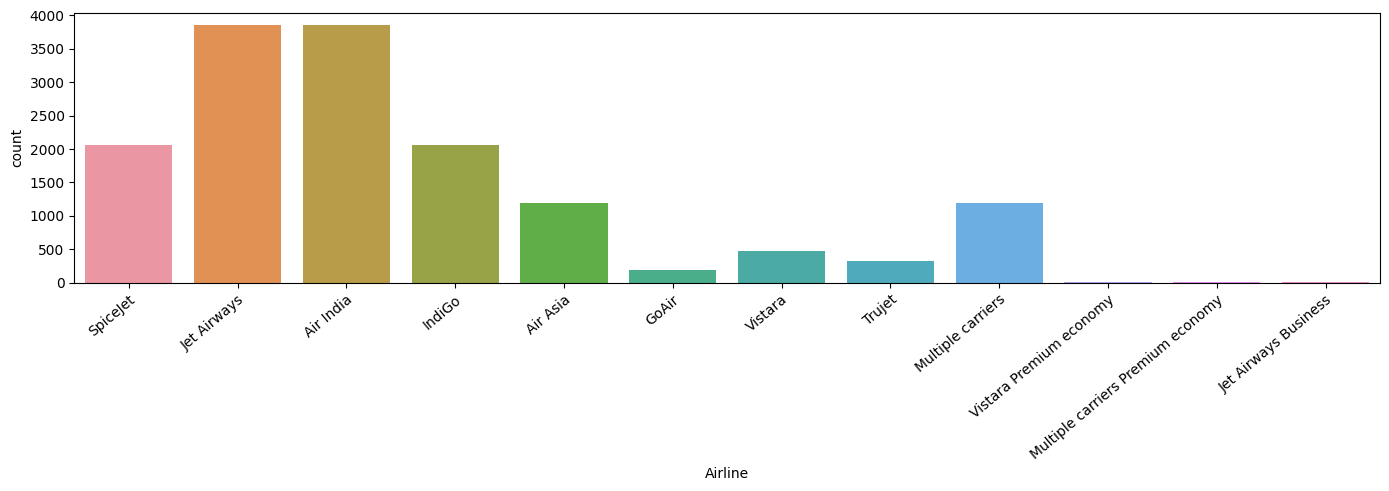

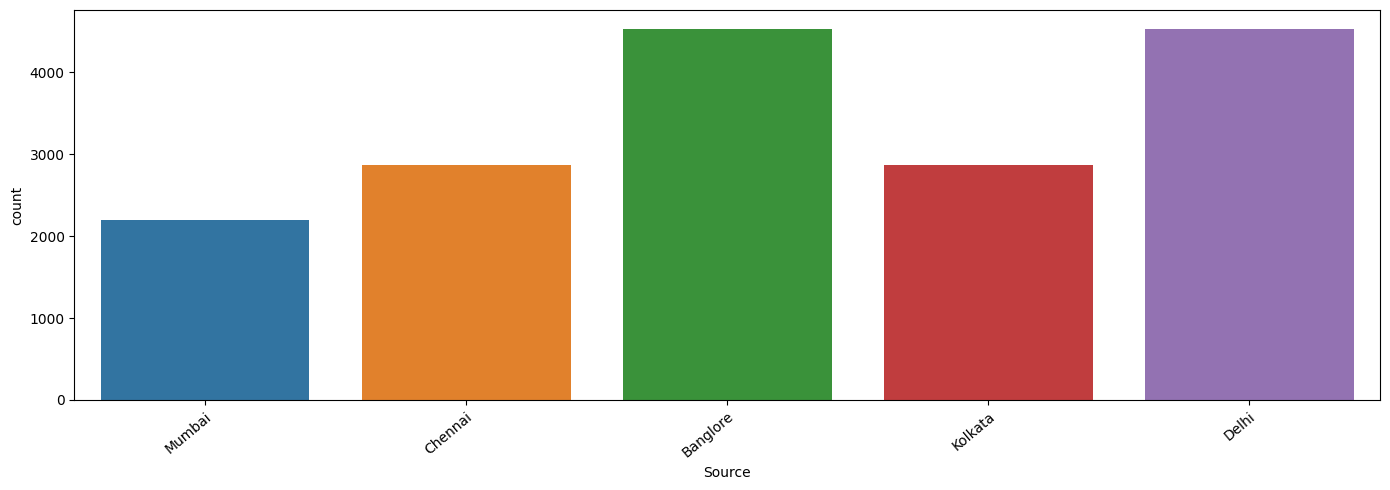

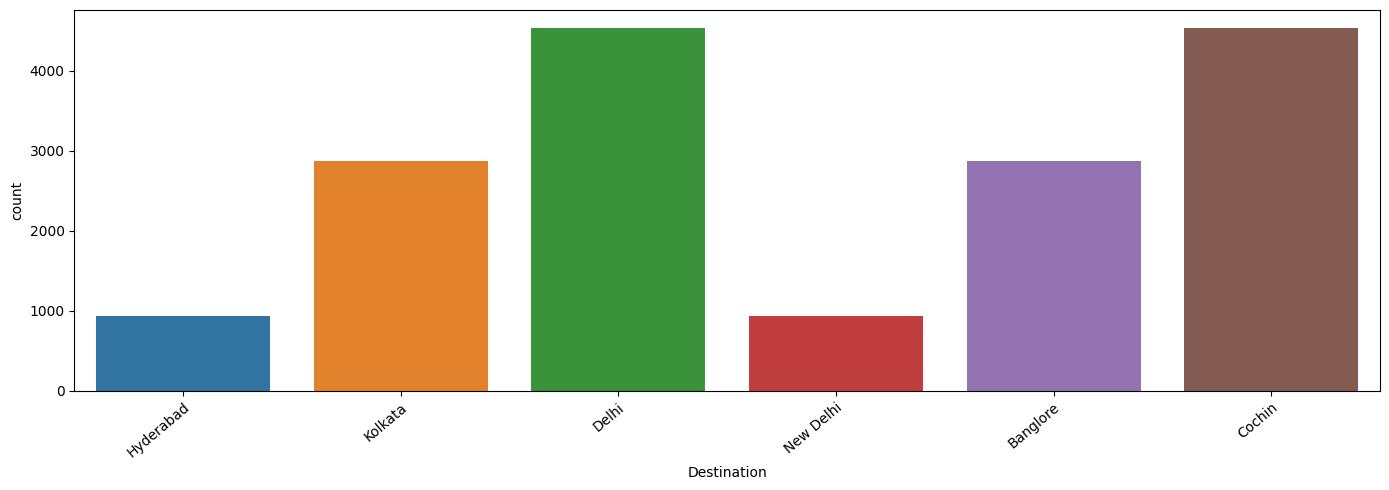

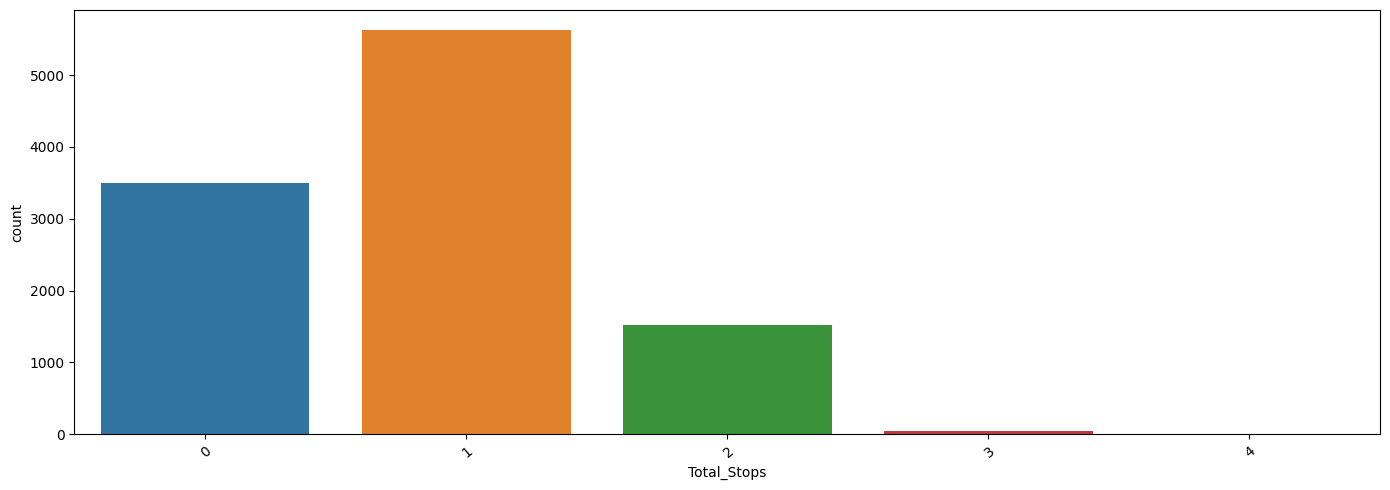

In [24]:
# Visualization of Price according to Airline, Source, Destination and Route
for i in ['Airline','Source','Destination','Total_Stops']:
    plt.figure(figsize=(14,5))
    sns.countplot(data=data1,x=i)
    ax=sns.countplot(x=i,data=data1.sort_values('Price',ascending=True))
    ax.set_xticklabels(ax.get_xticklabels(),rotation_mode='anchor',rotation=40,ha='right')
    plt.tight_layout()
    plt.show()
    print('\n')

# 6. Airline:

In [25]:
data1.groupby('Airline').describe()['Price'].sort_values('mean',ascending=False)

,count,mean,std,min,25%,50%,75%,max
Airline,,,,,,,,
Jet Airways Business,6.0,58358.666667,11667.596748,46490.0,52243.0,54747.0,61122.50,79512.0
Jet Airways,3849.0,11643.923357,4258.940578,1840.0,9134.0,11467.0,14151.00,54826.0
Multiple carriers Premium economy,13.0,11418.846154,1717.153936,9845.0,10161.0,11269.0,11269.00,14629.0
Multiple carriers,1196.0,10902.678094,3721.234997,5797.0,7723.0,10197.0,13587.00,36983.0
Air India,1751.0,9612.427756,3901.734561,2050.0,6891.0,9443.0,12219.00,31945.0
Vistara Premium economy,3.0,8962.333333,2915.405518,5969.0,7547.0,9125.0,10459.00,11793.0
Vistara,479.0,7796.348643,2914.298578,3687.0,5403.0,7980.0,9345.00,21730.0
GoAir,194.0,5861.056701,2703.585767,3398.0,3898.0,5135.0,6811.25,22794.0
IndiGo,2053.0,5673.682903,2264.142168,2227.0,4226.0,5000.0,6494.00,22153.0


In [26]:
# to convert categorical variables into dummy variables
Airline=pd.get_dummies(data1['Airline'],drop_first=True)
Airline.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [27]:
# to embed all the airlines as seperate feature/column into main data1, concatenation of Airline into data1
data1=pd.concat([data1,Airline],axis=1)
data1.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,IndiGo,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,...,0,1,0,0,0,0,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,...,0,0,0,0,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,...,0,0,1,0,0,0,0,0,0,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,...,0,1,0,0,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,...,0,1,0,0,0,0,0,0,0,0


In [28]:
data1.drop(['Airline'],axis=1,inplace=True)

In [29]:
data1.head()

,Source,Destination,Route,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,...,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,Banglore,New Delhi,BLR → DEL,170,0,3897,22,20,1,10,...,0,1,0,0,0,0,0,0,0,0
1,Kolkata,Banglore,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,...,0,0,0,0,0,0,0,0,0,0
2,Delhi,Cochin,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,...,0,0,1,0,0,0,0,0,0,0
3,Kolkata,Banglore,CCU → NAG → BLR,325,1,6218,18,5,23,30,...,0,1,0,0,0,0,0,0,0,0
4,Banglore,New Delhi,BLR → NAG → DEL,285,1,13302,16,50,21,35,...,0,1,0,0,0,0,0,0,0,0


# 7. Source and Destination:


In [30]:
# to get the count of source and destination in terms of values
list=['Source','Destination']
for i in list:
    print(data1[[i]].value_counts())

Source  
Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
dtype: int64
Destination
Cochin         4536
Banglore       2871
Delhi          1265
New Delhi       932
Hyderabad       697
Kolkata         381
dtype: int64


In [31]:
data1=pd.get_dummies(data=data1,columns=list,drop_first=True)
data1.head()

,Route,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months,...,Vistara Premium economy,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,BLR → DEL,170,0,3897,22,20,1,10,24,3,...,0,0,0,0,0,0,0,0,0,1
1,CCU → IXR → BBI → BLR,445,2,7662,5,50,13,15,5,1,...,0,0,0,1,0,0,0,0,0,0
2,DEL → LKO → BOM → COK,1140,2,13882,9,25,4,25,6,9,...,0,0,1,0,0,1,0,0,0,0
3,CCU → NAG → BLR,325,1,6218,18,5,23,30,5,12,...,0,0,0,1,0,0,0,0,0,0
4,BLR → NAG → DEL,285,1,13302,16,50,21,35,3,1,...,0,0,0,0,0,0,0,0,0,1


# 8. Route:


In [32]:
data1['Total_Stops'].value_counts()

1    5625
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [33]:
route=data1[['Route']]  # from total_stops we get no. of stops in the routes 
route.head()


,Route
0,BLR → DEL
1,CCU → IXR → BBI → BLR
2,DEL → LKO → BOM → COK
3,CCU → NAG → BLR
4,BLR → NAG → DEL


In [34]:
# 5 routes in total, route 1 index 0, route 2 index and so on till route 5 index 4
#CCU → IXR → BBI → BLR after conversion into string it will be like 'CCU IXR BBI BLR'
#CCU here is in 0th index will be saved to route 1
#IXR here is in 1st index will be saved to route 2
#BBI here is in 2nd index will be saved to route 3
#BLR here is in 3rd index will be saved to route 4
route['Route_1']=route['Route'].str.split('→').str[0]
route['Route_2']=route['Route'].str.split('→').str[1] 
route['Route_3']=route['Route'].str.split('→').str[2] 
route['Route_4']=route['Route'].str.split('→').str[3]
route['Route_5']=route['Route'].str.split('→').str[4]
route.head()


C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\952633665.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_1']=route['Route'].str.split('→').str[0]
C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\952633665.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route['Route_2']=route['Route'].str.split('→').str[1]
C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\952633665.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_ind

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,NaN,NaN,NaN
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,NaN
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,NaN
3,CCU → NAG → BLR,CCU,NAG,BLR,NaN,NaN
4,BLR → NAG → DEL,BLR,NAG,DEL,NaN,NaN


In [35]:
route.fillna('None',inplace=True)
route.head()

C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\1909610652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route.fillna('None',inplace=True)


,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,BLR,DEL,None,None,None
1,CCU → IXR → BBI → BLR,CCU,IXR,BBI,BLR,None
2,DEL → LKO → BOM → COK,DEL,LKO,BOM,COK,None
3,CCU → NAG → BLR,CCU,NAG,BLR,None,None
4,BLR → NAG → DEL,BLR,NAG,DEL,None,None


In [36]:
# to modify the label of features eg:- CCU to Route_1, IXR to Route_2 and so on.
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()
for i in range(1,6):
    col='Route_'+str(i)
    route[col]=le.fit_transform(route[col])

route.head()    
    
    

C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\3595408139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\3595408139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  route[col]=le.fit_transform(route[col])
C:\Users\rahul\AppData\Local\Temp\ipykernel_11868\3595408139.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value

,Route,Route_1,Route_2,Route_3,Route_4,Route_5
0,BLR → DEL,0,13,29,13,5
1,CCU → IXR → BBI → BLR,2,25,1,3,5
2,DEL → LKO → BOM → COK,3,32,4,5,5
3,CCU → NAG → BLR,2,34,3,13,5
4,BLR → NAG → DEL,0,34,8,13,5


In [37]:
del route['Route']

In [38]:
del data1['Route']

In [39]:
data1=pd.concat([data1,route],axis=1)
data1.head()

,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


In [40]:
data1.head()

,Duration,Total_Stops,Price,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months,Air India,...,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5
0,170,0,3897,22,20,1,10,24,3,0,...,0,0,0,0,1,0,13,29,13,5
1,445,2,7662,5,50,13,15,5,1,1,...,0,0,0,0,0,2,25,1,3,5
2,1140,2,13882,9,25,4,25,6,9,0,...,1,0,0,0,0,3,32,4,5,5
3,325,1,6218,18,5,23,30,5,12,0,...,0,0,0,0,0,2,34,3,13,5
4,285,1,13302,16,50,21,35,3,1,0,...,0,0,0,0,1,0,34,8,13,5


# Following is the Machine Learning Model, implemented and evaluated on the dataset:

In [41]:
 """Converting columns to the list in order to prevent scaling differentiation, 
 which will lead to prediction inaccuracy. This is an example of Normalization. We achieve this by 
 shifting the 'Price' column to the end or simply appending"""
    
temp_col=data1.columns.to_list() # to_list function converts dataframe into list
print(temp_col,'\n')   # to display the resulting list
new_col=temp_col[:2]+temp_col[3:] #to exclude price column, for the purpose of appending it later
new_col.append(temp_col[2])  # appending price column to the temp_col list
print(new_col,'\n')

# reindexing according to the updated list, new_col
data1=data1.reindex(columns=new_col)
data1.head()

['Duration', 'Total_Stops', 'Price', 'Dep_Time in hours', 'Dep_Time in minutes', 'Arrival_Time in hours', 'Arrival_Time in minutes', 'Days', 'Months', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad', 'Destination_Kolkata', 'Destination_New Delhi', 'Route_1', 'Route_2', 'Route_3', 'Route_4', 'Route_5'] 

['Duration', 'Total_Stops', 'Dep_Time in hours', 'Dep_Time in minutes', 'Arrival_Time in hours', 'Arrival_Time in minutes', 'Days', 'Months', 'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business', 'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet', 'Trujet', 'Vistara', 'Vistara Premium economy', 'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai', 'Destination_Cochi

,Duration,Total_Stops,Dep_Time in hours,Dep_Time in minutes,Arrival_Time in hours,Arrival_Time in minutes,Days,Months,Air India,GoAir,...,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi,Route_1,Route_2,Route_3,Route_4,Route_5,Price
0,170,0,22,20,1,10,24,3,0,0,...,0,0,0,1,0,13,29,13,5,3897
1,445,2,5,50,13,15,5,1,1,0,...,0,0,0,0,2,25,1,3,5,7662
2,1140,2,9,25,4,25,6,9,0,0,...,0,0,0,0,3,32,4,5,5,13882
3,325,1,18,5,23,30,5,12,0,0,...,0,0,0,0,2,34,3,13,5,6218
4,285,1,16,50,21,35,3,1,0,0,...,0,0,0,1,0,34,8,13,5,13302


In [42]:
# For Normalization, StandardScaler from sklearn module is used 

from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
data1=scaler.fit_transform(data1)

data1[0]  # it should represent 34 values as there are 34 columns


array([-0.93160111, -1.22066609,  1.65415376, -0.2349499 , -1.80043628,
       -0.8900139 ,  1.28553644, -0.84844966, -0.44278513, -0.13600489,
        2.05015058, -0.75053033, -0.02370671, -0.35507822, -0.03490678,
       -0.28797191, -0.00967596, -0.21667251, -0.01676082, -0.19231927,
       -0.85909313, -0.60626609, -0.2642058 , -0.85909313, -0.36651266,
       -0.2642058 , -0.19231927,  3.23440464, -1.67418972,  0.13765097,
        1.39512392,  0.40974412,  0.06420744, -1.12553455])

In [43]:
from sklearn.model_selection import train_test_split as tts 

x=data1[:, :-1]  # Fetching all the rows and columns, excluding last column - 'Price' 
y=data1[:,-1] # Fetching all the rows and last column-'Price' only


In [44]:
x_train,x_test,y_train,y_test=tts(x,y,test_size=0.1,random_state=69) # test_size is 10%
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(9613, 33)
(1069, 33)
(9613,)
(1069,)


# Model Selection



# Linear Regression:

In [45]:
from sklearn.linear_model import LinearRegression 
model=LinearRegression()
model.fit(x_train,y_train)

LinearRegression()

In [46]:
# importing root mean square errors and coefficient of determination from sklearn 
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

# to check how efficient a machine learning model is performing its job by finding the error criteria 
def metrics(y_true,y_pred):  
    print(f'Root Mean Squared Errors:',mean_squared_error(y_true,y_pred)**0.5)
    print(f'Coefficient of Determination:',r2_score(y_true,y_pred))
    print(f'Mean Absolute Error:',mean_absolute_error(y_true,y_pred))
    
# accuracy 
def accuracy(y_true,y_pred):
    errors=abs(y_true-y_pred)
    meanarth_percerr=100*np.mean(errors/y_true) # mean arithmetic percent error
    accuracy=100-meanarth_percerr #accuracy
    return accuracy




In [47]:
y_pred=model.predict(x_test)   # predicted value from x_test and storing it into y-pred variable
metrics(y_test,y_pred)       # y_test is passed as parameter into the metrics function to check the working of machine learning model

Root Mean Squared Errors: 0.5358400961916591
Coefficient of Determination: 0.6465016543123073
Mean Absolute Error: 0.4021174478515544


In [48]:
accuracy(y_test,y_pred) # to check the accuracy of the LinearRegression model

70.4989055967209

# RandomForestRegression:

In [49]:
from sklearn.ensemble import RandomForestRegressor
model2=RandomForestRegressor(n_estimators=500,min_samples_split=3)  #model is LinearRegression model and model2 is RandomForestRegressor model
model2.fit(x_train,y_train)

RandomForestRegressor(min_samples_split=3, n_estimators=500)

In [50]:
rf_predict=model2.predict(x_test)  # predicted value from x_test and storing it into rf_pred variable
metrics(y_test,rf_predict)  # rf_predict is passed through parameter of metrics to check the the working of the machine learning model 


Root Mean Squared Errors: 0.3945803692099575
Coefficient of Determination: 0.8083150927361281
Mean Absolute Error: 0.24839641168202536


In [51]:
accuracy(y_test,rf_predict) # to check the accuracy of the RandomForestRegressor model 

99.37477466336631

# Polynomial:

In [52]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
for deg in [1,2,3,4,5]:
    model3=make_pipeline(PolynomialFeatures(deg),LinearRegression())
    model3.fit(x_train,y_train)
    m_predict=model3.predict(x_test)
    metrics(y_test,m_predict)  

Root Mean Squared Errors: 0.5362783127186642
Coefficient of Determination: 0.6459232274211314
Mean Absolute Error: 0.4024650756391626
Root Mean Squared Errors: 16238.294471163541
Coefficient of Determination: -324636833.52828735
Mean Absolute Error: 497.0036275632939



KeyboardInterrupt



# Lasso:

In [53]:
 from sklearn.linear_model import Lasso
model4=Lasso()
model4.fit(x_train,y_train)
l_predict=model4.predict(x_test)
metrics(y_test,l_predict)


Root Mean Squared Errors: 0.9019291024903934
Coefficient of Determination: -0.0015249442191447304
Mean Absolute Error: 0.751779120563962


# Ridge:

In [55]:
from sklearn.linear_model import Ridge
model5=Ridge()
model5.fit(x_train,y_train)
ri_predict=model5.predict(x_test)
metrics(y_test,ri_predict)

Root Mean Squared Errors: 0.5363700204550839
Coefficient of Determination: 0.6458021173370303
Mean Absolute Error: 0.4023505842826661


# ElasticNet:

In [57]:
from sklearn.linear_model import ElasticNet
model6=ElasticNet()
model6.fit(x_train,y_train)
el_pred=model6.predict(x_test)
metrics(y_test,el_pred)

Root Mean Squared Errors: 0.8483860324289175
Coefficient of Determination: 0.11385663710580785
Mean Absolute Error: 0.701619696923304
